In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
submission = pd.read_csv("gender_submission.csv")

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
440,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0,1,1,F.C.C. 13529,26.2500,NaN,S
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
487,488,0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
393,394,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,35273,113.2750,D36,C
566,567,0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S


In [ ]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_df.shape

(891, 12)

In [ ]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
for column in train_df.columns:
    if train_df[column].dtype == 'object':  # Check if the column contains categorical data
        mode_val = train_df[column].mode()[0]  # Calculate the mode for categorical columns
        train_df[column].fillna(mode_val, inplace=True)

In [ ]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [ ]:
train_df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [ ]:
train_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
train_df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [ ]:
surv_train_df = train_df[train_df['Survived'] == 1]
surv_train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [ ]:
pclass_list = train_df['Pclass'].value_counts().index.to_list()
pclass_list.sort()
surv_rate_pclass = [1, 1, 1]
for i, pclass in enumerate(pclass_list):
    surv_rate_pclass[i] = len(train_df['Pclass'][train_df['Survived'] == 1][train_df['Pclass'] == pclass]) / len(train_df['Pclass'][train_df['Pclass'] == pclass])
surv_rate_pclass = pd.DataFrame({'Pclass' : pclass_list, 'Survival Rate' : surv_rate_pclass})
surv_rate_pclass

,Pclass,Survival Rate
0,1,0.629630
1,2,0.472826
2,3,0.242363


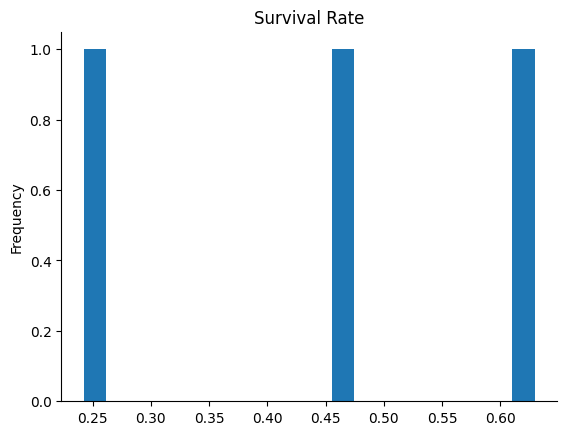

In [ ]:
from matplotlib import pyplot as plt
surv_rate_pclass['Survival Rate'].plot(kind='hist', bins=20, title='Survival Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
fem_surv_rate = len(train_df.loc[(train_df['Survived'] == 1) & (train_df['Sex'] == 'female')]) / len(train_df.loc[train_df['Sex'] == 'female'])
mal_surv_rate = len(train_df.loc[(train_df['Survived'] == 1) & (train_df['Sex'] == 'male')]) / len(train_df.loc[train_df['Sex'] == 'male'])
print('Female Survival Rate: ', fem_surv_rate)
print('Male Survival Rate: ', mal_surv_rate)

Female Survival Rate:  0.7420382165605095
Male Survival Rate:  0.18890814558058924


In [ ]:
fare_surv = train_df['Fare'][train_df['Survived'] == 1].median()
fare_cas = train_df['Fare'][train_df['Survived'] == 0].median()
fare_desc = pd.DataFrame({'surv' : [0,1], 'median_fare' : [fare_cas,fare_surv]}, index = [0, 1])
fare_desc

,surv,median_fare
0,0,10.5
1,1,26.0


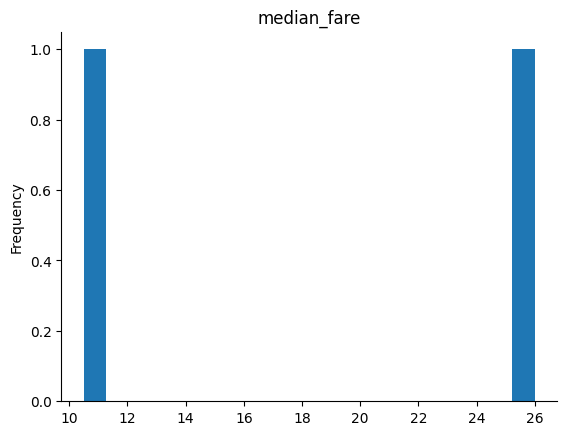

In [ ]:
from matplotlib import pyplot as plt
fare_desc['median_fare'].plot(kind='hist', bins=20, title='median_fare')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
embarked_values = train_df['Embarked'].value_counts().index.to_list()
embarked_survival = [1, 1, 1]
for i in range(len(embarked_values)):
    surv_rate = len(train_df[(train_df['Embarked'] == embarked_values[i]) & (train_df['Survived'] == 1)]) / len(train_df[train_df['Embarked'] == embarked_values[i]])
    embarked_survival[i] = surv_rate
result = pd.DataFrame({'port': embarked_values, 'surv_rate' : embarked_survival})
print(result)

  port  surv_rate
0    S   0.339009
1    C   0.553571
2    Q   0.389610


In [ ]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


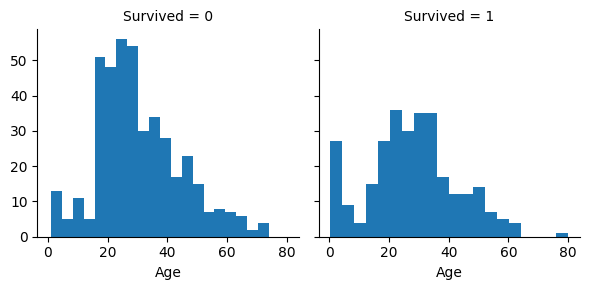

In [ ]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-pack

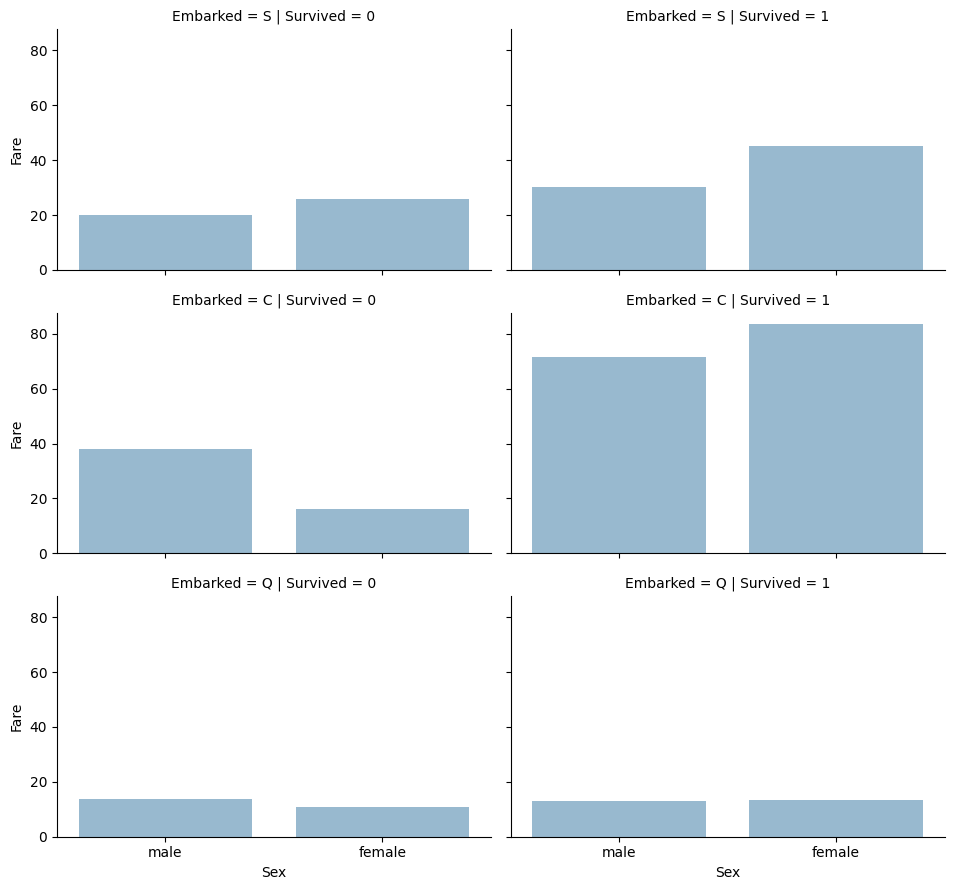

In [ ]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

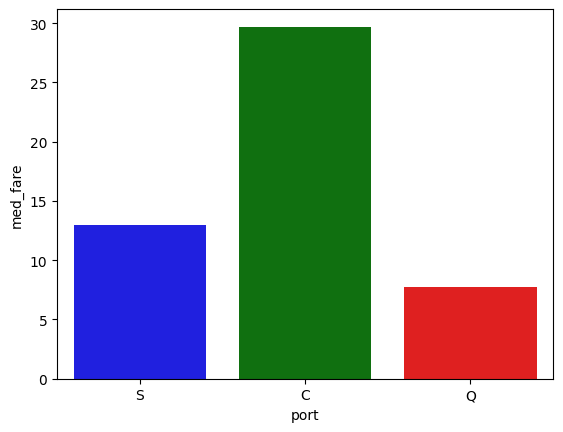

In [ ]:
fare_s = train_df['Fare'][train_df['Embarked'] == 'S'].median()
fare_c = train_df['Fare'][train_df['Embarked'] == 'C'].median()
fare_q = train_df['Fare'][train_df['Embarked'] == 'Q'].median()
fare_port_data = pd.DataFrame({'med_fare' : [fare_s, fare_c, fare_q],'port' : ['S', 'C', 'Q']})
custom_palette = {'S': 'blue', 'C': 'green', 'Q': 'red'}

sns.barplot(data=fare_port_data, x='port', y='med_fare', hue='port', palette=custom_palette)

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


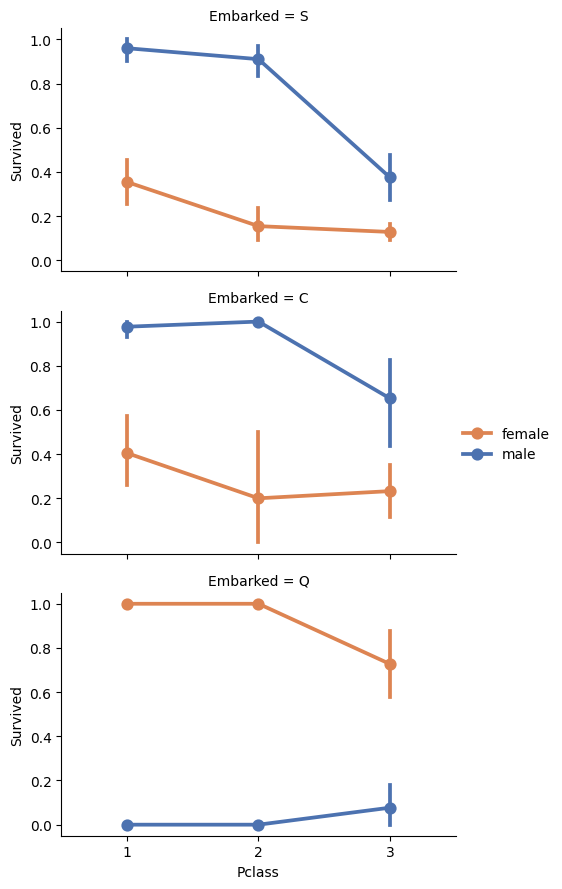

In [ ]:
grid = sns.FacetGrid(train_df, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

<Axes: xlabel='Pclass', ylabel='Count'>

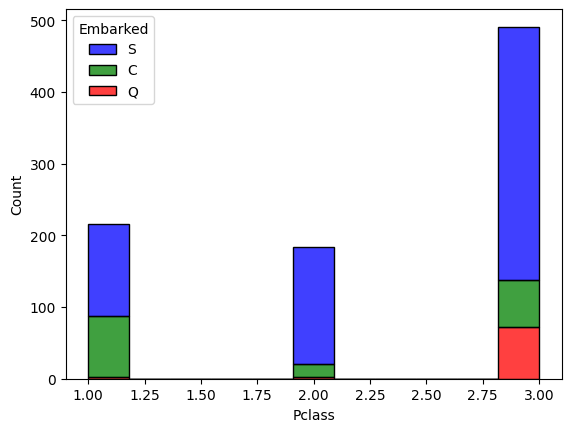

In [ ]:
custom_palette = {'S': 'blue', 'C': 'green', 'Q': 'red'}
sns.histplot(data = train_df, x = 'Pclass', hue = 'Embarked', multiple = 'stack', palette=custom_palette)

<Axes: xlabel='Age', ylabel='Count'>

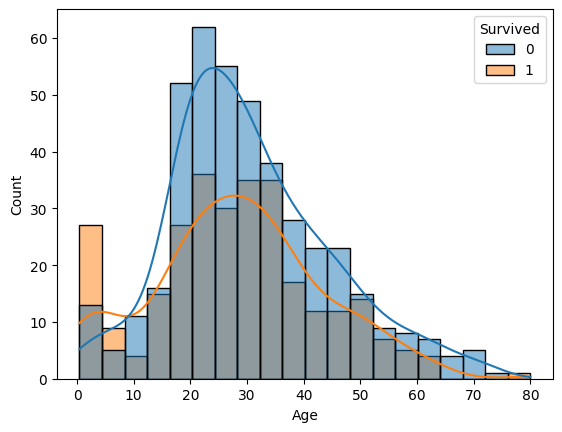

In [ ]:
sns.histplot(data = train_df, x = 'Age', hue = 'Survived', kde = True, label = 'all_data')

In [ ]:
age_means = train_df.groupby(['Pclass', 'Sex'])['Age'].mean()
age_means

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

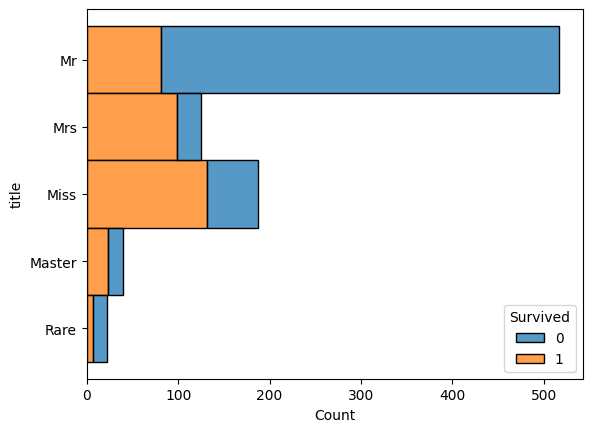

In [ ]:
train_df['title'] = train_df['title'].replace(['Dr', 'Rev', 'Major', 'Col', 'th', 'Capt', 'Sir', 'Don', 'Jonkheer'], 'Rare')
test_df['title'] = test_df['title'].replace(['Dr', 'Rev', 'Major', 'Col', 'th', 'Capt', 'Sir', 'Don', 'Jonkheer'], 'Rare')
train_df['title'] = train_df['title'].replace(['Mlle', 'Ms', 'Lady', 'Mme', 'Dona'], 'Miss')
test_df['title'] = test_df['title'].replace(['Mlle', 'Ms', 'Lady', 'Mme', 'Dona'], 'Miss')
histplot = sns.histplot(data = train_df, y = 'title', hue = 'Survived', multiple = 'stack')

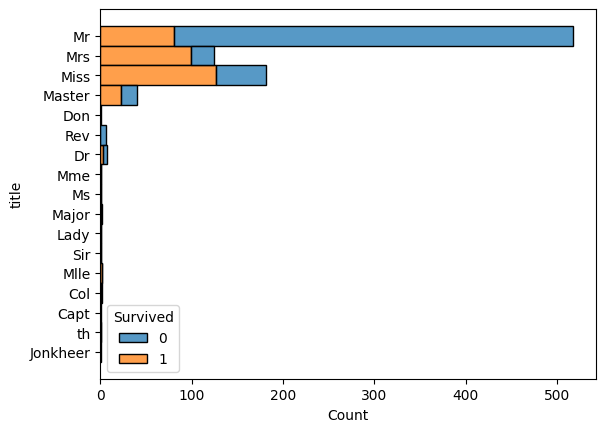

In [ ]:
split_name = train_df['Name'].str.split(', ', expand = True)
title = split_name[1].str.split(". ", n = 1).str[0]
train_df['title'] = title
split_name = test_df['Name'].str.split(', ', expand = True)
title_test = split_name[1].str.split(". ", n = 1).str[0]
test_df['title'] = title_test
histplot = sns.histplot(data = train_df, y = 'title', hue = 'Survived', multiple = 'stack')